In [6]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision import models, transforms

In [18]:

# Load a pre-trained DeepLabV3 model with a ResNet-50 backbone
model = models.segmentation.deeplabv3_resnet50(pretrained=True)
model.eval()

# Preprocess the input image
def preprocess_image(image_path):
    # Load image and resize to 256x256
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    # Convert to tensor and normalize
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(image).unsqueeze(0), image  # Add batch dimension and return original image

# Perform inference and visualize
def segment_image(model, image_tensor, original_image):
    with torch.no_grad():
        # Predict the segmentation mask
        output = model(image_tensor)['out']
        output = output.squeeze(0).cpu().numpy()  # Remove batch dimension and convert to numpy array
        # Get the class with the highest probability at each pixel
        segmentation_map = np.argmax(output, axis=0)
        
    # Visualize the original image and the segmentation mask
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    # Colorize the segmentation map
    colors = np.array([[0, 0, 0], [0, 255, 0], [0, 0, 255], [255, 0, 0]])  # Add more colors if needed
    color_mask = colors[segmentation_map % len(colors)]
    plt.imshow(color_mask)
    plt.title("Segmentation Mask")
    plt.axis('off')
    
    plt.show()



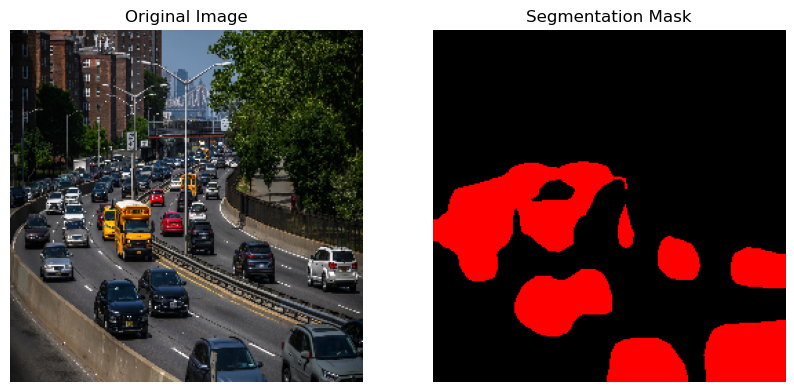

In [19]:
# Example usage
cars = "C:/Users/Baron/Desktop/EE_267_Repo/EE_267/%PATH_EE267%/EE267_env//pictures/cars.png"
image_tensor, original_image = preprocess_image(cars)
segment_image(model, image_tensor, original_image)